In [20]:
from shiny import *
import pins
import requests as req
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [2]:
%load_ext dotenv
%dotenv

In [3]:
board = pins.board_rsconnect(server_url="https://colorado.rstudio.com/rsc")
df_stations = board.pin_read("alex.gold/bike_station_info")
df_stations.head()

,station_id,name,lat,lon
0,1,Eads St & 15th St S,38.858971,-77.053230
1,2,18th St & S Eads St,38.857250,-77.053320
2,3,Crystal Dr & 20th St S,38.856425,-77.049232
3,4,Crystal Dr & 15th St S,38.860170,-77.049593
4,5,Aurora Hills Cmty Ctr / 18th St & S Hayes St,38.857866,-77.059490


In [4]:
location_options = {
    str(df_stations["station_id"][l]): df_stations["name"][l] for l in df_stations.index
    }

In [5]:
location_options['1']

'Eads St & 15th St S'

In [6]:
[(key, location_options[key]) for key in location_options][:5]

[('1', 'Eads St & 15th St S'),
 ('2', '18th St & S Eads St'),
 ('3', 'Crystal Dr & 20th St S'),
 ('4', 'Crystal Dr & 15th St S'),
 ('5', 'Aurora Hills Cmty Ctr / 18th St & S Hayes St')]

In [25]:
app_ui = ui.page_fluid(
    ui.input_select("station_name", "Select input", location_options),
    ui.output_text_verbatim("txt"),
)

In [28]:
shiny.Inputs?

Object `shiny.Inputs` not found.


In [7]:
def server(input1: Inputs, output: Outputs, session: Session):
    @output()
    @render_text()
    def txt():
        return f'x: "{location_options[input1.x()]}"'

In [8]:
r = req.get(
        "https://colorado.rstudio.com/rsc/bike_predict_api/pred",
        params={"station_id": '1'},
        )

In [9]:
prediction = pd.DataFrame.from_dict(r.json())

In [16]:
import matplotlib.dates as md

In [10]:
prediction["times"][:5]

0    2022-04-28 13:28:03
1    2022-04-28 13:38:03
2    2022-04-28 13:48:03
3    2022-04-28 13:58:03
4    2022-04-28 14:08:03
Name: times, dtype: object

In [28]:
pd.to_datetime(prediction['times'][:5]).dt.strftime("%H:%M")

0    13:28
1    13:38
2    13:48
3    13:58
4    14:08
Name: times, dtype: object

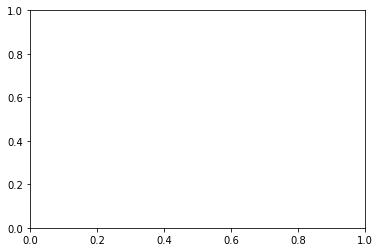

In [29]:
fig, ax = plt.subplots()

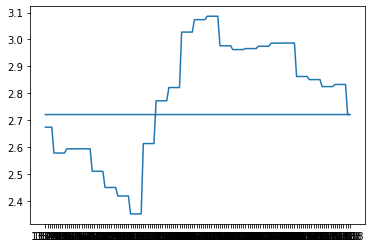

In [31]:
plt.plot(pd.to_datetime(prediction['times']).dt.strftime("%H:%M"), prediction["pred"])
ax.set(xlabel="Time",
       ylabel="# of bikes",
       title="Bike Availability")
time_form = DateFormatter("%H:%M:%S")
ax.xaxis.set_major_formatter(time_form)

In [ ]:
app = App(app_ui, server, debug=True)